In [55]:
import os.path
import glob

import paws.api
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [68]:
paw = paws.api.start()
paw.add_wf('classifier_test')
paw.activate_op('IO.CSV.CSVToXYData')
paw.activate_op('PROCESSING.SAXS.SpectrumProfiler')
paw.activate_op('PROCESSING.SAXS.SpectrumClassifier')

paw.add_op('read_csv','IO.CSV.CSVToXYData')
paw.add_op('profile','PROCESSING.SAXS.SpectrumProfiler')
paw.add_op('classify','PROCESSING.SAXS.SpectrumClassifier')

paw.set_input('profile','q','read_csv.outputs.x')
paw.set_input('profile','I','read_csv.outputs.y')

Enabling Operation IO.CSV.CSVToXYData...
Finished enabling IO.CSV.CSVToXYData
Enabling Operation PROCESSING.SAXS.SpectrumClassifier...
Finished enabling PROCESSING.SAXS.SpectrumClassifier
Enabling Operation PROCESSING.SAXS.SpectrumProfiler...
Finished enabling PROCESSING.SAXS.SpectrumProfiler
Enabling Operation IO.CSV.CSVToXYData...
Finished enabling IO.CSV.CSVToXYData
Enabling Operation PROCESSING.SAXS.SpectrumProfiler...
Finished enabling PROCESSING.SAXS.SpectrumProfiler
Enabling Operation PROCESSING.SAXS.SpectrumClassifier...
Finished enabling PROCESSING.SAXS.SpectrumClassifier


In [69]:
with open('scalers_and_models.pkl', 'rb') as fid:
    s_and_m = pickle.load(fid)

scalers = s_and_m['scalers'] # dict of scalers
models = s_and_m['models'] # dict of models

In [70]:
paw.set_input('classify','scalers',scalers,'auto')
paw.set_input('classify','classifiers',models,'auto')

paw.set_input('classify','profiler_output','profile.outputs.features')

# Testing PAWS on The Testing Set

In [71]:
test = pd.read_pickle('paws_test.pkl')
test.head()

,name,q_Imax,Imax_over_Imean,Imax_over_Ilowq,Imax_over_Ihighq,Imax_sharpness,low_q_ratio,high_q_ratio,log_fluctuation,0,...,95,96,97,98,99,bad_data,form,precursor,structure,str_label
1453,R7/R7_SAXS_0061_dz_bgsub,0.070,54.279213,35.025656,5148.683686,2.072658,0.996221,0.003749,10.239152,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,True,form_structure
862,R3/R3_cool_0041_dz_bgsub,0.052,32.572613,20.970892,7780.293842,1.664051,0.998494,0.001490,2.642981,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,True,True,form_precursor_structure
413,R12/R12cooling2rd_0006_dz_bgsub,0.040,15.597771,10.082157,1020.818642,1.026497,0.994472,0.005507,7.211712,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,form_
162,R1/R1_addOAC1_0015_dz_bgsub,0.040,18.734042,12.065037,3715.888830,1.036291,0.998166,0.001824,9.022609,0.0,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,form_
1879,Reaction_G/G_60C_10min_0214163030_0001_dz_bgsub,0.040,3.738025,2.699466,12.156567,1.140351,0.889271,0.109591,8.257134,0.0,...,0.0,0.0,0.0,0.0,0.0,False,False,True,False,precursor_


In [72]:
test.shape

(200, 114)

In [73]:
names = list(test['name'])
files_to_test = []
for f in names:
    f = '2016_saxs_data/' + f + '.csv'
    files_to_test.append(f)

In [74]:
bad_data_labels = []
form_factor_scattering = []
precursor_scattering = []
diffraction_peaks = []

for fname in files_to_test:
    paw.set_input('read_csv','file_path',fname)
    paw.execute()
    f = paw.get_output('classify','population_flags')

    bad_data_labels.append(f['bad_data'])
    form_factor_scattering.append(f['form_factor_scattering'])
    precursor_scattering.append(f['precursor_scattering'])
    diffraction_peaks.append(f['diffraction_peaks'])

running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution f

running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['read_csv']
running: ['profile']
running: ['classify']
execution finished
running: ['rea

In [75]:
test['paws_pr_bad_data'] =  bad_data_labels
test['paws_pr_form'] =  form_factor_scattering
test['paws_pr_precursor'] =  precursor_scattering
test['paws_pr_structure'] =  diffraction_peaks

In [76]:
accuracy_score(test['bad_data'], test['paws_pr_bad_data'])

1.0

In [77]:
accuracy_score(test['form'], test['paws_pr_form'])

0.995

In [78]:
accuracy_score(test['precursor'], test['paws_pr_precursor'])

0.95999999999999996

In [79]:
accuracy_score(test['structure'], test['paws_pr_structure'])

0.995

## Bad_Data

In [80]:
accuracy_score(test['bad_data'], test['paws_pr_bad_data'])

1.0

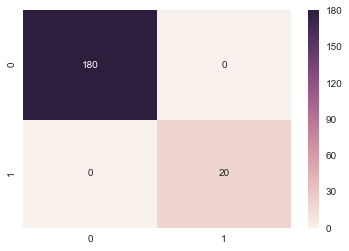

In [81]:
cnf_matrix = confusion_matrix(test['bad_data'], test['paws_pr_bad_data'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

## Form

In [82]:
accuracy_score(test['form'], test['paws_pr_form'])

0.995

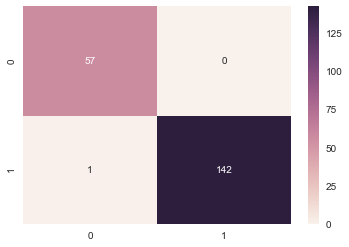

In [83]:
cnf_matrix = confusion_matrix(test['form'], test['paws_pr_form'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 1 false negative:

In [84]:
difference = test[test['form'] != test['paws_pr_form']]
difference[['name', 'str_label','form','paws_pr_form']]

,name,str_label,form,paws_pr_form
1225,R5/R5_SAXS_0029_dz_bgsub,form_precursor_,True,False


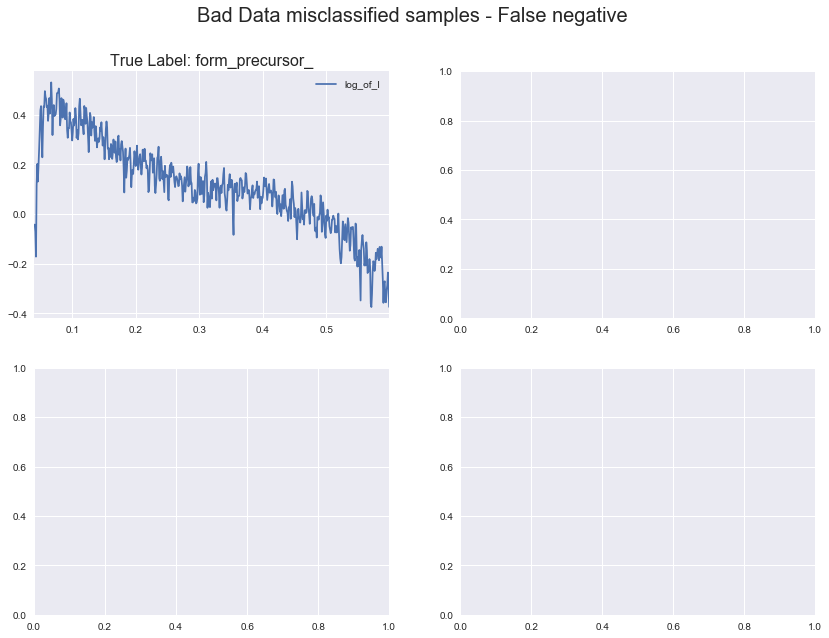

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Bad Data misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = d.iloc[0]
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## Precursor

In [86]:
accuracy_score(test['precursor'], test['paws_pr_precursor'])

0.95999999999999996

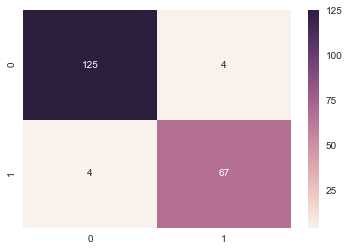

In [87]:
cnf_matrix = confusion_matrix(test['precursor'], test['paws_pr_precursor'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 4 false negative and 4 false positive:

In [88]:
difference = test[test['precursor'] != test['paws_pr_precursor']]
difference[['name', 'str_label','precursor','paws_pr_precursor']]

,name,str_label,precursor,paws_pr_precursor
1545,Reaction_A/A_colling_60C_0212122720_0001_dz_bgsub,form_structure,False,True
1244,R5/R5_SAXS_0048_dz_bgsub,form_precursor_structure,True,False
1485,Reaction_A/A_245C_0212114602_0001_dz_bgsub,form_precursor_,True,False
1796,Reaction_E/E_270C_0213202445_0001_dz_bgsub,form_precursor_,True,False
1917,Reaction_H/H_280C_0214203949_0001_dz_bgsub,form_,False,True
1495,Reaction_A/A_272C_0212115023_0001_dz_bgsub,form_structure,False,True
1870,Reaction_G/G_280C_15min_0214173702_0001_dz_bgsub,form_structure,False,True
1905,Reaction_H/H_263C_0214203533_0001_dz_bgsub,form_precursor_,True,False


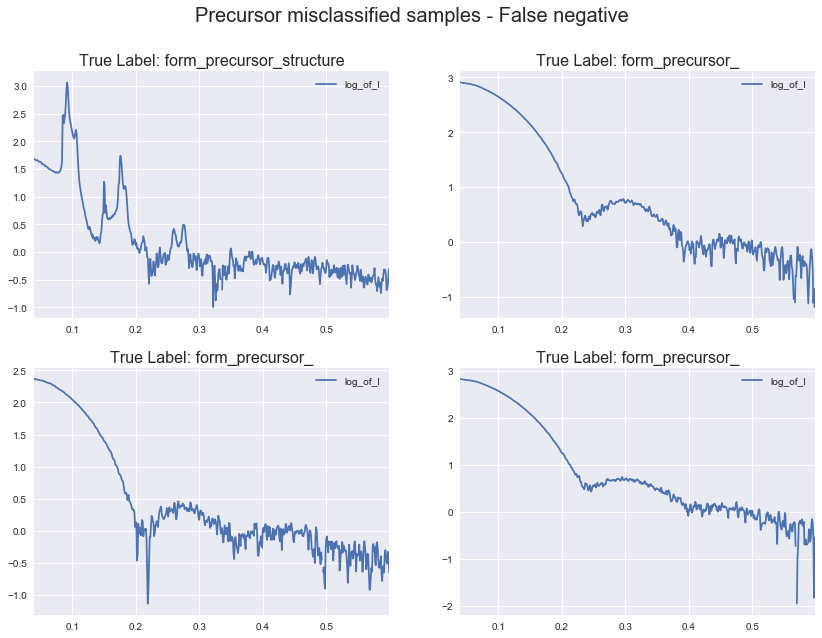

In [89]:
false_negative = difference[difference['precursor'] == True]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Precursor misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(false_negative)): 
    d = false_negative.iloc[n]
    file_name = d.iloc[0]
    str_label = false_negative.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

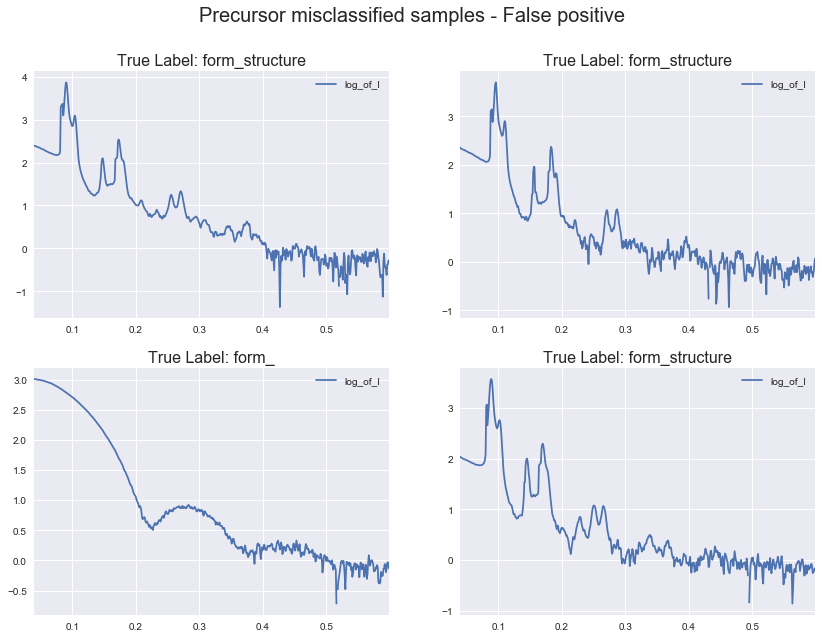

In [90]:
false_positive = difference[difference['precursor'] == False]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Precursor misclassified samples - False positive", fontsize=20)
st.set_y(0.97)

for n in range(len(false_positive)): 
    d = false_positive.iloc[n]
    file_name = d.iloc[0]
    str_label = false_positive.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## Structure

In [91]:
accuracy_score(test['structure'], test['paws_pr_structure'])

0.995

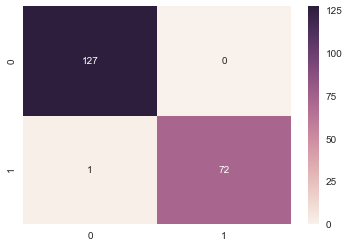

In [92]:
cnf_matrix = confusion_matrix(test['structure'], test['paws_pr_structure'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

In [93]:
difference = test[test['structure'] != test['paws_pr_structure']]
difference[['name', 'str_label','structure','paws_pr_structure']]

,name,str_label,structure,paws_pr_structure
785,R2/R2_SAXS_0039_dz_bgsub,form_precursor_structure,True,False


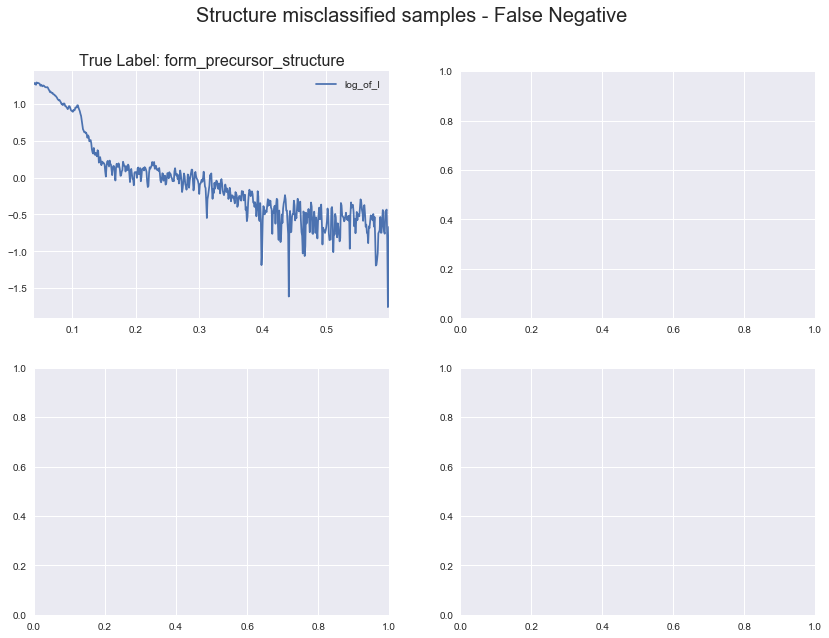

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("Structure misclassified samples - False Negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = d.iloc[0]
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label , fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

### Accuracy of PAWS on the testing set (200 samples)

|            | feature set | accuracy on testing set 
| ------------- | ------------- |----------------
| bad_data  | analytical features + 60 bins strengths  | 1.000 
| form  | 60 bins strengths  | 0.995 
| precursor | analytical features + 60 bins strengths | 0.960 
| structure | analytical features + 60 bins strengths | 0.995 